<a href="https://colab.research.google.com/github/guilhermelaviola/SoccerCompetitionsStudy/blob/main/UCLStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')
drive.mount('/content/drive')

<ipython-input-11-921de9e8a408>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Setting the search parameters
filename = 'uefa-competitions-finals.xlsx'
search_path = '/content/drive/My Drive/Datasets/Soccer'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file= os.path.join(root, filename)
        break
    df = pd.read_excel(file)

In [13]:
# Importing the dataset:
uefa_competitions = pd.ExcelFile(file)
ucl = pd.read_excel(uefa_competitions, 'UEFA Champions League finals')

# Displaying the last 5 champions:
ucl.tail()

,Season,Year,Winners country,Winners,Score,Runners-up,Runners-up country,Venue,Host city,Host Country,Attendance,How the match was won
63,2018–19,2019,England,Liverpool,2–0,Tottenham Hotspur,England,Metropolitano Stadium,Madrid,Spain,63272,Regular time
64,2019–20,2020,Germany,Bayern Munich,1–0,Paris Saint-Germain,France,Estádio da Luz,Lisbon,Portugal,0,Regular time
65,2020–21,2021,England,Chelsea,1–0,Manchester City,England,Estádio do Dragão,Porto,Portugal,14110,Regular time
66,2021–22,2022,Spain,Real Madrid,1–0,Liverpool,England,Stade de France,Saint-Denis,France,75000,Regular time
67,2022–23,2023,England,Manchester City,1–0,Inter Milan,Italy,Atatürk Olympic Stadium,Istanbul,Turkey,71412,Regular time


In [14]:
# Displaying the number of rows and columns in the dataset:
ucl.shape

(68, 12)

In [15]:
# Displaying the datatypes presented in the columns:
ucl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Season                 68 non-null     object
 1   Year                   68 non-null     int64 
 2   Winners country        68 non-null     object
 3   Winners                68 non-null     object
 4   Score                  68 non-null     object
 5   Runners-up             68 non-null     object
 6   Runners-up country     68 non-null     object
 7   Venue                  68 non-null     object
 8   Host city              68 non-null     object
 9   Host Country           68 non-null     object
 10  Attendance             68 non-null     int64 
 11  How the match was won  68 non-null     object
dtypes: int64(2), object(10)
memory usage: 6.5+ KB


In [16]:
# Displaying general statistical information of the number data present in the dataset:
ucl.describe()

,Year,Attendance
count,68.00000,68.000000
mean,1989.50000,64462.058824
std,19.77372,20543.209798
min,1956.00000,0.000000
25%,1972.75000,53153.500000
50%,1989.50000,63136.000000
75%,2006.25000,71956.500000
max,2023.00000,127621.000000


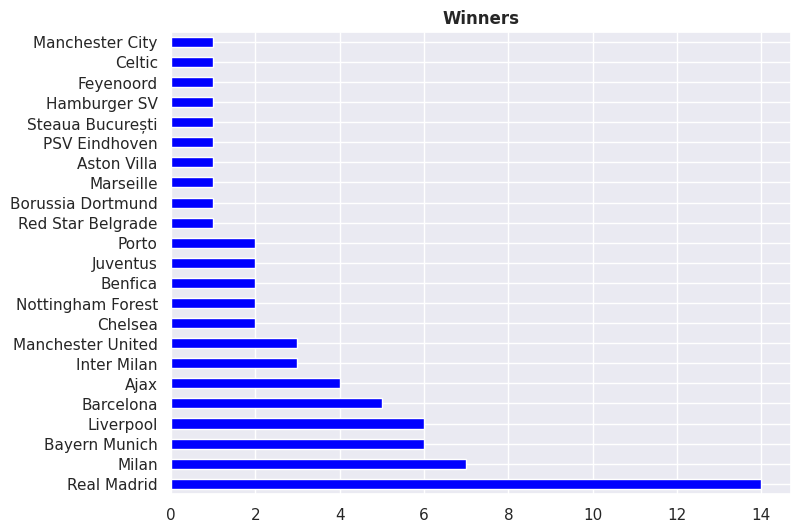

In [18]:
# Displaying the number of titles by club:
ucl['Winners'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 6))
plt.ylabel(None)
plt.title('Winners', fontweight = 'bold')
plt.show()

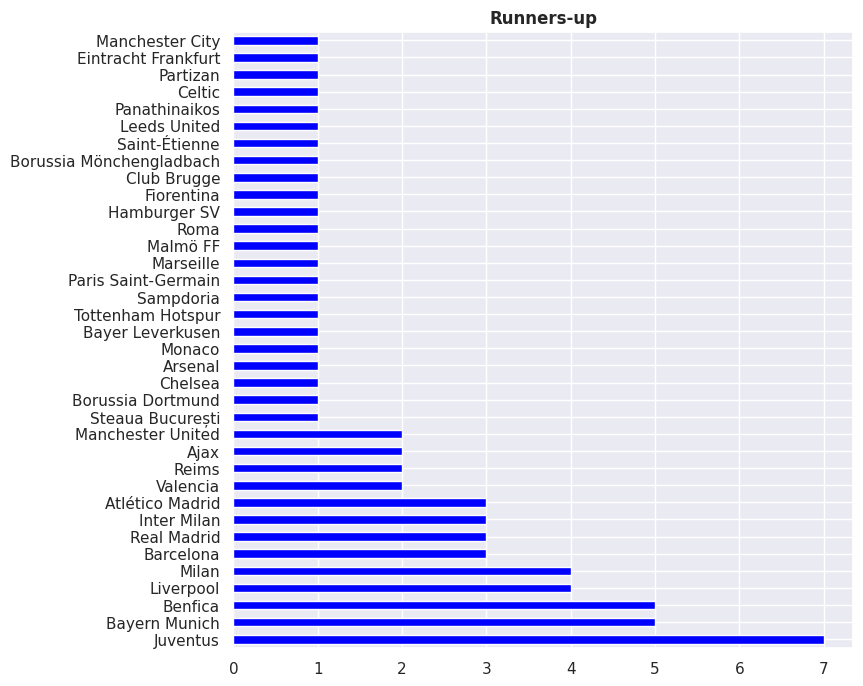

In [19]:
# Displaying the number of runners-up by club:
ucl['Runners-up'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 8))
plt.ylabel(None)
plt.title('Runners-up', fontweight = 'bold')
plt.show()

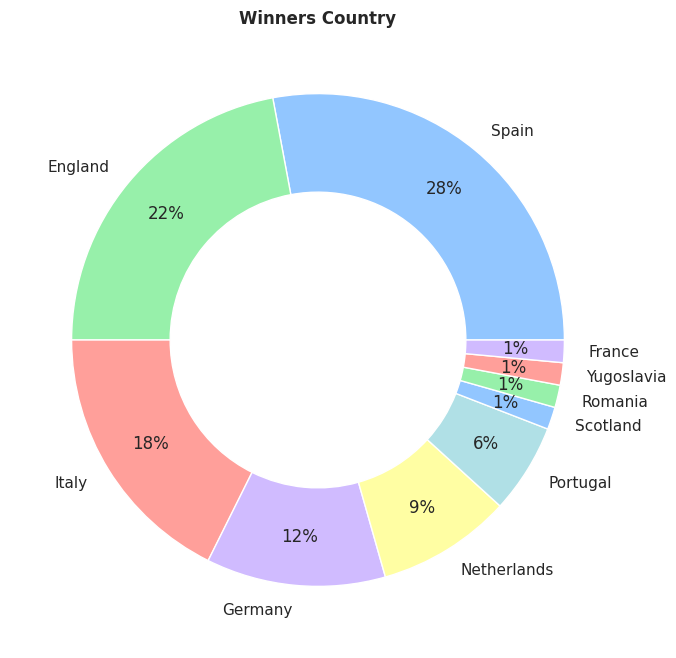

In [20]:
# Displaying the number of titles by country:
ucl['Winners country'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Winners Country', fontweight = 'bold')
plt.show()

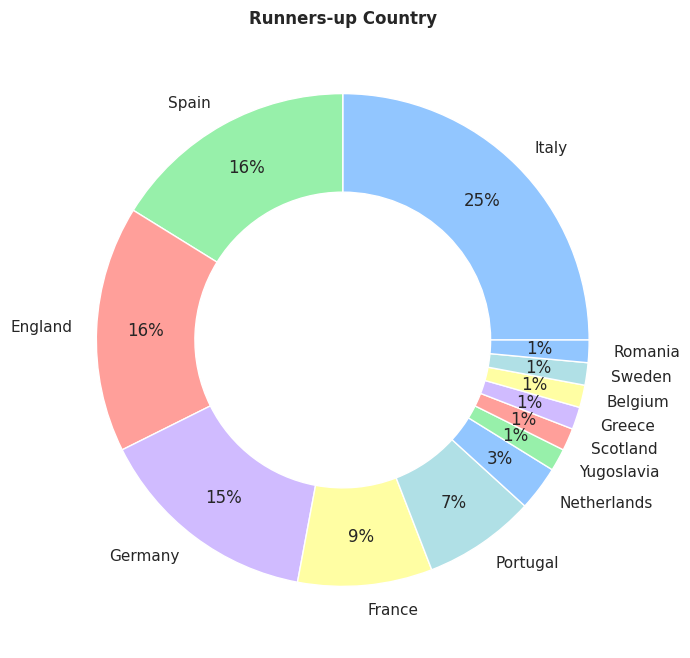

In [21]:
# Displaying the number of runners-up by country:
ucl['Runners-up country'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Runners-up Country', fontweight = 'bold')
plt.show()

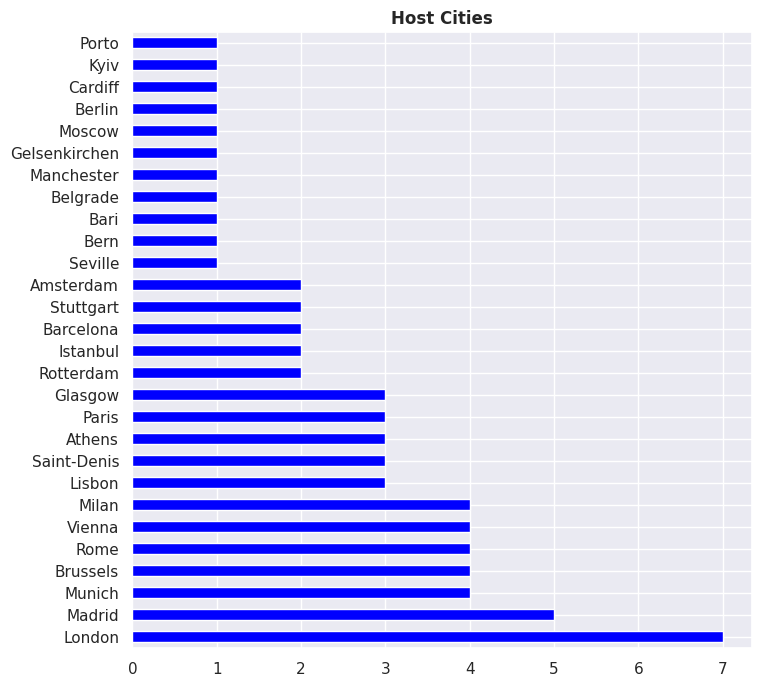

In [22]:
# Displaying the cities that hosted finals:
ucl['Host city'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 8))
plt.ylabel(None)
plt.title('Host Cities', fontweight = 'bold')
plt.show()

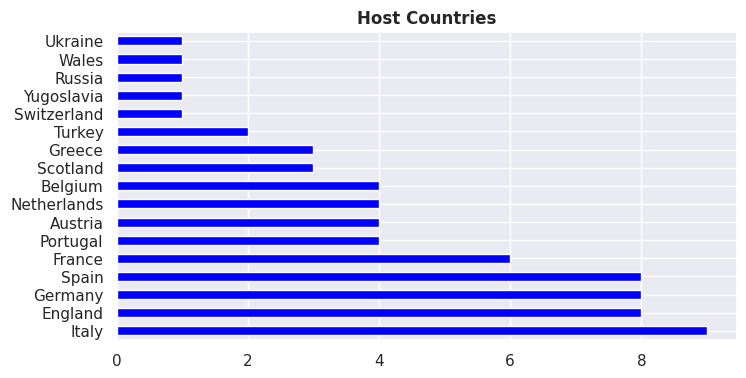

In [23]:
# Displaying the countries that hosted finals:
ucl['Host Country'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Host Countries', fontweight = 'bold')
plt.show()

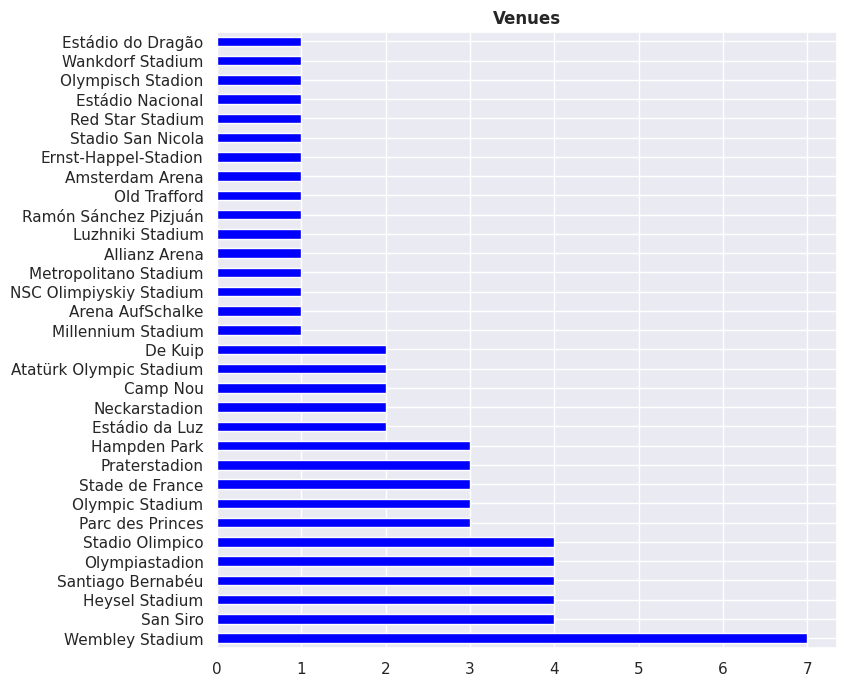

In [24]:
# Displaying the venues that hosted finals:
ucl['Venue'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 8))
plt.ylabel(None)
plt.title('Venues', fontweight = 'bold')
plt.show()

In [25]:
# Checking if the club won UCL at home or away:
def champion_at_home(row):
  winners_country = row['Winners country']
  host_country = row['Host Country']
  if winners_country == host_country:
    result = 'Home'
  else:
    result = 'Away'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
ucl['Home champion?'] = ucl.apply(champion_at_home, axis=1)
ucl.head()

,Season,Year,Winners country,Winners,Score,Runners-up,Runners-up country,Venue,Host city,Host Country,Attendance,How the match was won,Home champion?
0,1955–56,1956,Spain,Real Madrid,4–3,Reims,France,Parc des Princes,Paris,France,38239,Regular time,Away
1,1956–57,1957,Spain,Real Madrid,2–0,Fiorentina,Italy,Santiago Bernabéu,Madrid,Spain,124000,Regular time,Home
2,1957–58,1958,Spain,Real Madrid,3–2,Milan,Italy,Heysel Stadium,Brussels,Belgium,67000,Extra time,Away
3,1958–59,1959,Spain,Real Madrid,2–0,Reims,France,Neckarstadion,Stuttgart,Germany,72000,Regular time,Away
4,1959–60,1960,Spain,Real Madrid,7–3,Eintracht Frankfurt,Germany,Hampden Park,Glasgow,Scotland,127621,Regular time,Away


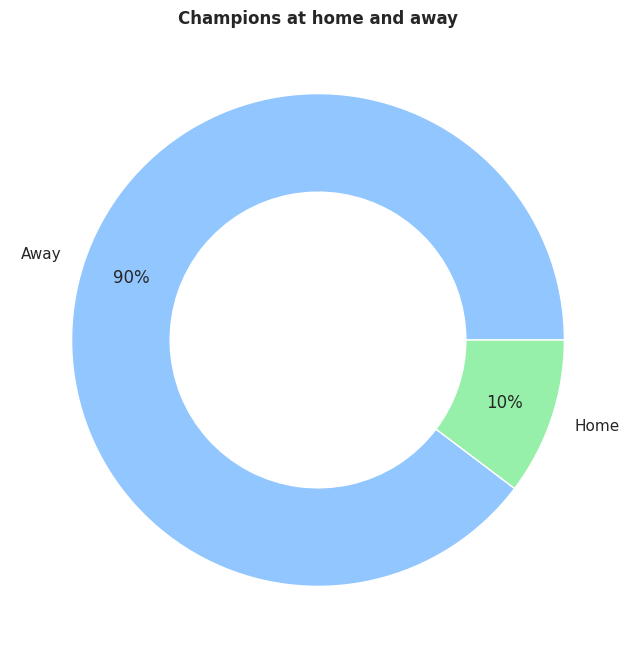

In [26]:
# Displaying the clubs who were champions at home and away:
ucl['Home champion?'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Champions at home and away', fontweight = 'bold')
plt.show()

In [27]:
# Checking if the club was UCL runner-up at home or away:
def runner_up_at_home(row):
  runners_up_country = row['Runners-up country']
  host_country = row['Host Country']
  if runners_up_country == host_country:
    result = 'Home'
  else:
    result = 'Away'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
ucl['Home runners-up?'] = ucl.apply(runner_up_at_home, axis=1)
ucl.head()

,Season,Year,Winners country,Winners,Score,Runners-up,Runners-up country,Venue,Host city,Host Country,Attendance,How the match was won,Home champion?,Home runners-up?
0,1955–56,1956,Spain,Real Madrid,4–3,Reims,France,Parc des Princes,Paris,France,38239,Regular time,Away,Home
1,1956–57,1957,Spain,Real Madrid,2–0,Fiorentina,Italy,Santiago Bernabéu,Madrid,Spain,124000,Regular time,Home,Away
2,1957–58,1958,Spain,Real Madrid,3–2,Milan,Italy,Heysel Stadium,Brussels,Belgium,67000,Extra time,Away,Away
3,1958–59,1959,Spain,Real Madrid,2–0,Reims,France,Neckarstadion,Stuttgart,Germany,72000,Regular time,Away,Away
4,1959–60,1960,Spain,Real Madrid,7–3,Eintracht Frankfurt,Germany,Hampden Park,Glasgow,Scotland,127621,Regular time,Away,Away


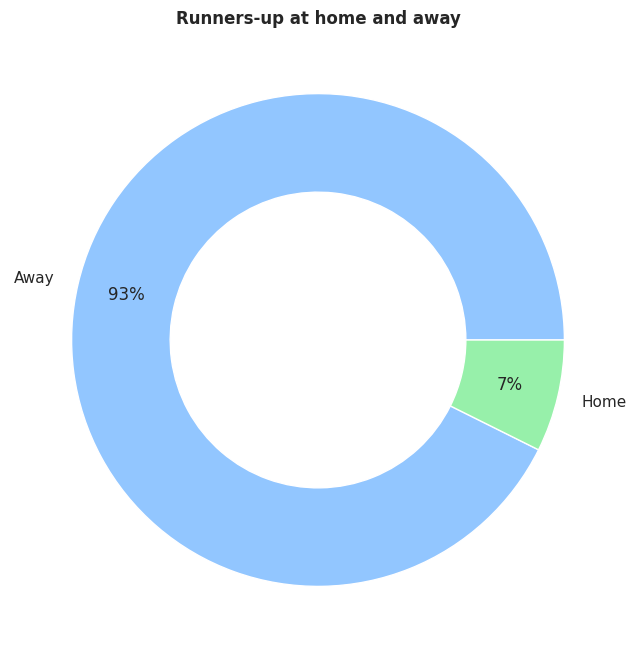

In [28]:
# Displaying the clubs who were runners-up at home and away:
ucl['Home runners-up?'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Runners-up at home and away', fontweight = 'bold')
plt.show()

In [29]:
# Checking what decade the club won UCL:
def winner_by_decade(row):
  year = row['Year']
  if year >= 1950 and year <= 1959:
    decade = '1950s'
  elif year >= 1960 and year <= 1969:
    decade = '1960s'
  elif year >= 1970 and year <= 1979:
    decade = '1970s'
  elif year >= 1980 and year <= 1989:
    decade = '1980s'
  elif year >= 1990 and year <= 1999:
    decade = '1990s'
  elif year >= 2000 and year <= 2009:
    decade = '2000s'
  elif year >= 2010 and year <= 2019:
    decade = '2010s'
  elif year >= 2020 and year <= 2029:
    decade = '2020s'
  else:
    decade = 'Unknown'
  return decade

# Applying the function above on a column of the dataset and generating a new column as result:
ucl['Decade'] = ucl.apply(winner_by_decade, axis=1)
ucl.head()

,Season,Year,Winners country,Winners,Score,Runners-up,Runners-up country,Venue,Host city,Host Country,Attendance,How the match was won,Home champion?,Home runners-up?,Decade
0,1955–56,1956,Spain,Real Madrid,4–3,Reims,France,Parc des Princes,Paris,France,38239,Regular time,Away,Home,1950s
1,1956–57,1957,Spain,Real Madrid,2–0,Fiorentina,Italy,Santiago Bernabéu,Madrid,Spain,124000,Regular time,Home,Away,1950s
2,1957–58,1958,Spain,Real Madrid,3–2,Milan,Italy,Heysel Stadium,Brussels,Belgium,67000,Extra time,Away,Away,1950s
3,1958–59,1959,Spain,Real Madrid,2–0,Reims,France,Neckarstadion,Stuttgart,Germany,72000,Regular time,Away,Away,1950s
4,1959–60,1960,Spain,Real Madrid,7–3,Eintracht Frankfurt,Germany,Hampden Park,Glasgow,Scotland,127621,Regular time,Away,Away,1960s


In [30]:
def performance_by_decade(dec):
  decade = ucl['Decade']
  if decade.equals(dec):
    ucl['Winners'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 8))
    plt.ylabel(None)
    plt.title('Winners in' + dec, fontweight = 'bold')
    plt.show()

In [32]:
performance_by_decade('1960s')

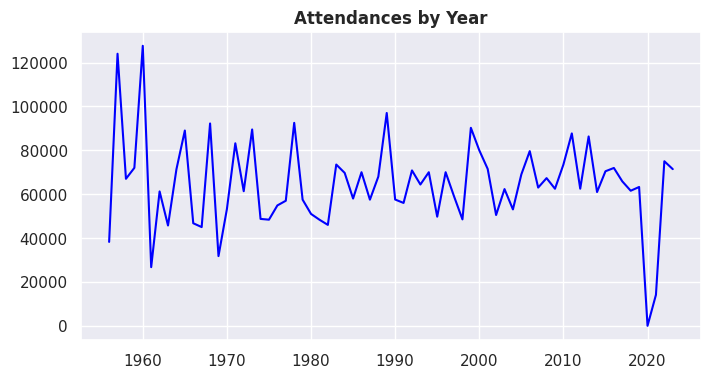

In [33]:
# Displaying the attendances by year:
plt.figure(figsize = (8, 4))
plt.title('Attendances by Year', fontweight = 'bold')
plt.plot(ucl['Year'], ucl['Attendance'], color = 'blue')
plt.show()